### Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import plot_importance

from sklearn.model_selection import train_test_split


# ML model evaluation
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

### Data ingest

In [2]:
data_path = './data/' 
data_file = 'data_Xy_0_4_10K.csv'

df = pd.read_csv(data_path + data_file)
df['Label'].value_counts()

4.0    5146
0.0    5000
Name: Label, dtype: int64

In [20]:
l = [1,2,3,4]
l[:-2]

[1, 2]

In [24]:

# print(len(df.columns))
# print(list(df.columns[:-2]))
# print(len(col_df))
new_df = pd.DataFrame(columns=list(df.columns)[:-2])
new_df.to_csv("../Fold1/file.csv", sep=',',header=True ,index=False)
new_df.shape

(0, 136)

### X. Binary label creation

In [5]:
df['Label_binary'] = np.NaN
df.loc[df.Label == 0, 'Label_binary'] = 0
df.loc[df.Label == 4, 'Label_binary'] = 1

#df.loc[df.Label == 1, 'Label_binary'] = 1
#df.loc[df.Label == 2, 'Label_binary'] = 1
#df.loc[df.Label == 3, 'Label_binary'] = 1
#df.loc[df.Label == 4, 'Label_binary'] = 1

display(df['Label_binary'].value_counts())
display(df['Label'].value_counts())

1.0    5146
0.0    5000
Name: Label_binary, dtype: int64

4.0    5146
0.0    5000
Name: Label, dtype: int64

### Prepare data for machine learning

In [6]:
df_y = df[['Label_binary']]
df_X = df.drop(columns = ['Label', 'Label_binary'])
print(df.shape, df_X.shape, df_y.shape)

(10146, 138) (10146, 136) (10146, 1)


In [7]:
X = df_X.values
y = df_y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6797, 136) (3349, 136) (6797, 1) (3349, 1)


### Train and evaluate an xgboost classification model

##### Helper functions

In [8]:
def eval_ml_model(label, y_test_in, y_pred_in):
    """
    Evaluate maching learning (ML) model, binary classification
    """
    print(label)
    print(" ")
    
    score_accuracy = accuracy_score(y_test_in, y_pred_in)
    score_precision = precision_score(y_test_in, y_pred_in)
    score_recall = recall_score(y_test_in, y_pred_in)
    score_f1 = f1_score(y_test_in, y_pred_in)
    score_roc_auc = roc_auc_score(y_test_in, y_pred_in)
    score_confmat = confusion_matrix(y_test_in, y_pred_in)
    
    #print('Accuracy: ', score_accuracy)
    #print('Precision: ', score_precision)
    #print('Recall: ', score_recall)
    #print('F1: ', score_f1)
    #print('ROC_AUC:', score_roc_auc)
    #print(score_confmat)
    
    df_scores = pd.DataFrame({'Metric':['Accuracy','Prcision','Recall','F1','ROC_AUC'],
                              'Score': [score_accuracy, score_precision, score_recall, score_f1, score_roc_auc]
                             })
    
    display(df_scores)
    
    viz_confusion_matrix(score_confmat)
    
    print(" ")
    
def viz_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    # plt.savefig('./figures/confusion_matrix.png', dpi=300)
    plt.show()

##### Model training and evaluation

In [9]:
clf_xgb = xgb.XGBClassifier() # max_depth=2
clf_xgb.fit(X_train, y_train)
y_train_pred_xgb = clf_xgb.predict(X_train)
y_test_pred_xgb = clf_xgb.predict(X_test)

XGBoost, training data: 
 


,Metric,Score
0,Accuracy,0.999853
1,Prcision,0.999711
2,Recall,1.000000
3,F1,0.999855
4,ROC_AUC,0.999850


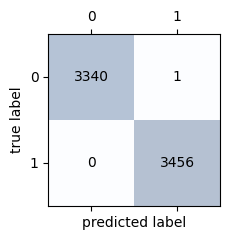

In [10]:
eval_ml_model('XGBoost, training data: ', y_train, y_train_pred_xgb)

XGBoost, testing data: 
 


,Metric,Score
0,Accuracy,0.876978
1,Prcision,0.875882
2,Recall,0.881065
3,F1,0.878466
4,ROC_AUC,0.876940


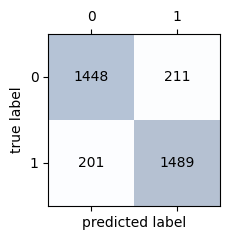

In [11]:
eval_ml_model('XGBoost, testing data: ', y_test, y_test_pred_xgb)

### Model interpretation: feature importance

In [12]:
clf_xgb = xgb.XGBClassifier() # max_depth=2
clf_xgb.fit(df_X, df_y)
y_train_pred_xgb = clf_xgb.predict(df_X)
#y_test_pred_xgb = clf_xgb.predict(X_test)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1000x5000 with 0 Axes>

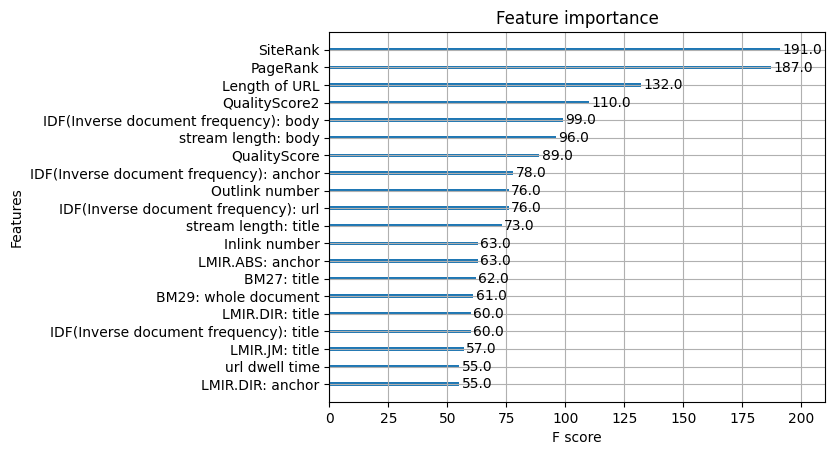

In [13]:
plt.figure(figsize=(10,50))
#plot_importance(clf_xgb)
plot_importance(clf_xgb, max_num_features=20) # top 10 most important features

Note, SiteRank indicates "Site level PageRank" (see https://www.microsoft.com/en-us/research/project/mslr/)